### 사용할 라이브러리

In [1]:
### 데이터 조작
import pandas as pd

### 데이터 시각화
import matplotlib.pyplot as plt

### 날짜 데이터를 처리하기 위한 라이브러리
from datetime import datetime

### 시계열 분석 모델
# - 사전 설치 필요 : pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA


- 시계열 분석
    - 사용 모델 : ARIMA 모델 사용
    - 이외 SARIMA 모델, LSTM 모델, XGBoot 등이 있음
    - 주로 시계열 분석에서는 ARIMA 모델을 사용함
- 사용할 데이터셋
    - 년월별 항공기 탑승객 수 데이터 사용
- 시계열 예측
    - 년월별 데이터를 이용하여 훈련 후 > 향후 년월에 대한 예측 진행

### 데이터 수집하기 (AirPassengers 데이터셋)

In [2]:
### 데이터셋 : github에서 제공하는 데이터 사용
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

### csv 함수로 읽어들이기
# 데이터 프레임 변수명 : data
data = pd.read_csv(url)
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 데이터 전처리

In [4]:
### 년월(Month) 컬럼의 타입을 날짜 타입으로 변경
data["Month"] = pd.to_datetime(data["Month"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
### 날짜 타입(Month)의 데이터를 인덱스로 변환
data.set_index("Month", inplace=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### 년월별 탑승객수 추이 시각화

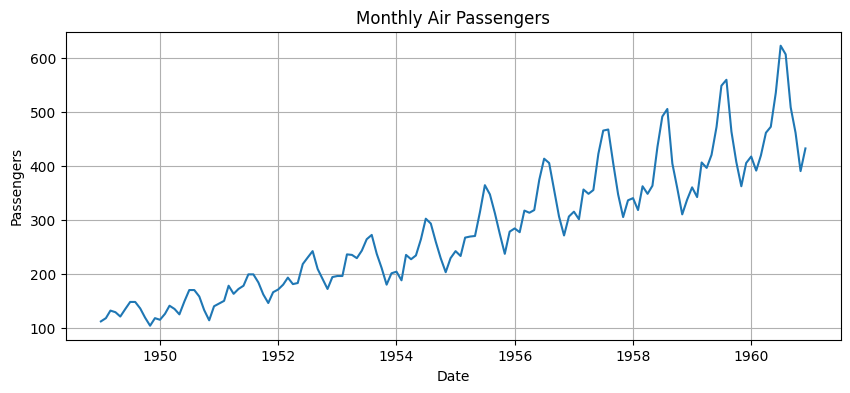

In [8]:
### matplotlib 라이브러리 이용하여 선그래프 그리기(추기 시각화)
plt.figure(figsize=(10, 4))
plt.title("Monthly Air Passengers")

plt.plot(data)
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()

In [9]:
data.tail() ## 마지막 값 확인

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### 훈련 및 테스트 데이터로 분리하기

In [10]:
### 훈련 데이터 : 1949 ~ 1959년 데이터
train = data.loc["1949" : "1959"]

### 테스트데이터 : 1960년 데이터
test = data.loc["1960" :]

### 모델 학습하기

In [13]:
### ARIMA 모델 사용
# - 훈련 데이터 사용
# - order = (p, d, q) = (자기회귀값, 차분값, 이동평균값)
# - p, d, q의 값은 다음에 개념 설명(시계열 전처리 영역)
# 시계열 분석에서 독립변수=시간데이터(인덱스), 종속변수=일반데이터(탑승객수)
model = ARIMA(train, order=(2, 1, 2))

c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
# 모델 훈련 시키기
model_fit = model.fit()

### 예측하기

In [16]:
### 향후 12개월(1960년 데이터) 데이터로 예측하기
# - 시계열 분석에서 예측은 forecast라고 함
forecast = model_fit.forecast(steps=12)
forecast

1960-01-01    411.312453
1960-02-01    430.812660
1960-03-01    457.433604
1960-04-01    483.661491
1960-05-01    502.616753
1960-06-01    509.821046
1960-07-01    504.207053
1960-08-01    488.158646
1960-09-01    466.639307
1960-10-01    445.702753
1960-11-01    430.821634
1960-12-01    425.487307
Freq: MS, Name: predicted_mean, dtype: float64

### 예측 결과 시각화하기(선그래프)

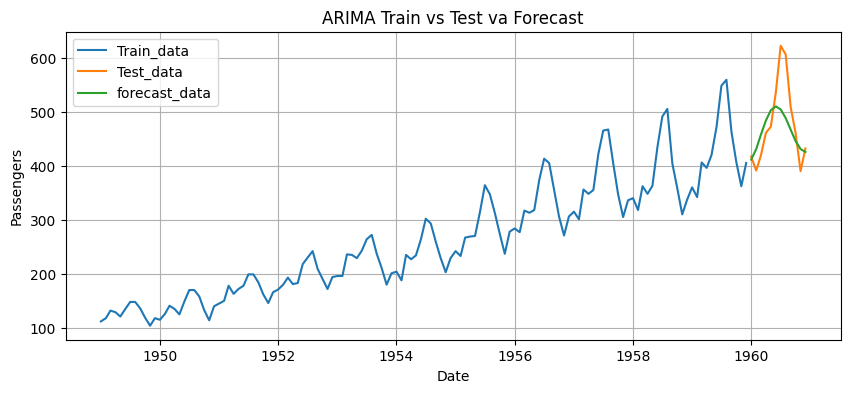

In [17]:
### 훈련 실제값, 테스트 실제값, 예측값 각 3개의 선그래프를 하나의 그래프에 표현
### matplotlib 라이브러리 이용하여 선그래프 그리기(추기 시각화)
plt.figure(figsize=(10, 4))
plt.title("ARIMA Train vs Test va Forecast")

plt.plot(train, label="Train_data")
plt.plot(test, label="Test_data")
plt.plot(forecast, label="forecast_data")

plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()